In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Data Loading and Filtering

In [2]:
df = pd.read_csv('../zuu crew scores.csv')
df = df[df['CourseName']=='Foundations of ML']
del df['MemberName'], df['CourseName']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CapstoneScore
0,3,79.9,43.7,2,0,62.8,5.0,45.3
1,2,76.8,95.6,6,0,87.4,2.7,78.8
2,3,96.6,75.9,8,0,98.4,2.8,65.4
4,2,83.2,24.0,6,0,41.8,4.2,40.1
7,3,86.5,88.0,5,0,23.9,1.3,68.2


In [3]:
Y = df['CapstoneScore'].values
X_df = df.drop(columns=['CapstoneScore'])

# Calculate mean and std for each feature (column)
mean = X_df.mean()
std = X_df.std()

# Standardize each column
X_standardized = (X_df - mean) / std

# Convert to numpy array
X = X_standardized.values

In [4]:
X = np.column_stack((
    np.ones(len(df)),
    X
))

#### Compute Cost

In [5]:
def compute_cost(X,beta,Y):
    y_hat = X.dot(beta) 
    m = len(Y)
    cost = (1 /(2 * m)) * np.sum((y_hat - Y)**2)
    return cost

#### Optimization

In [6]:
cost_history=[]
def gradient_descent(X,Y,beta,n_iter,lr):
    m = len(Y)

    for i in range(n_iter):
        y_hat = X.dot(beta) 
        gradient = (1/m) * X.T.dot(y_hat - Y)
        beta = beta - lr * gradient
        cost  = compute_cost(X,beta,Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"iteration: {i}, beta:{beta}, cost:{cost}")
    
    return beta


#### Checking

In [7]:
beta = np.random.randn(8)
n_iter = 1000
lr = 0.01

In [8]:
beta = gradient_descent(X,Y,beta,n_iter,lr)

iteration: 0, beta:[ 1.42278651 -0.09240702  2.30110384  1.08363303 -0.28716474  0.15969576
  0.89927837 -0.85904989], cost:1569.1334771725571
iteration: 100, beta:[35.45768694 -0.63010888  1.34179844 10.47853251  0.64317386 -0.37587682
  1.22423125  0.71438799], cost:219.65627259061026
iteration: 200, beta:[47.91556123 -0.53677256  0.96524285 13.94367031  0.43796361 -0.18654056
  1.08616767  1.35001715], cost:38.87598301395086
iteration: 300, beta:[ 5.24755461e+01 -4.29136815e-01  8.21447545e-01  1.52884812e+01
  1.71131994e-01  2.30444887e-02  9.89973876e-01  1.56359446e+00], cost:14.337392828382935
iteration: 400, beta:[ 5.41446481e+01 -3.74167663e-01  7.69557402e-01  1.58318395e+01
 -4.59163052e-03  1.59652893e-01  9.55259240e-01  1.62113238e+00], cost:10.961082988648046
iteration: 500, beta:[54.75559336 -0.3532436   0.75246224 16.05850104 -0.1047313   0.23843284
  0.95036547  1.62946313], cost:10.487065461011092
iteration: 600, beta:[54.97921909 -0.3478097   0.74768619 16.15556976

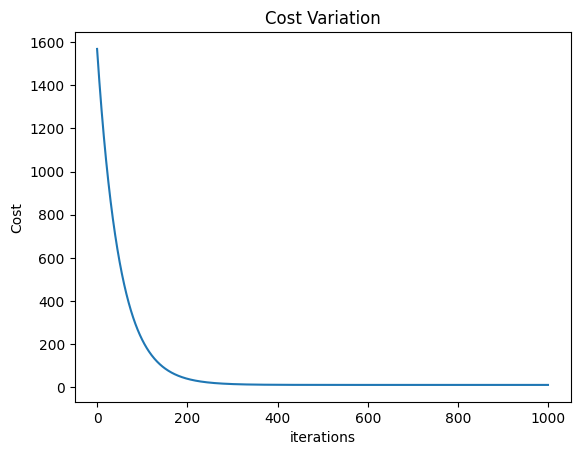

In [9]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

#### Model Evaluation

In [10]:
Y_hat = X.dot(beta) 
Y_hat

array([49.96539835, 79.29450232, 68.47680259, 36.56202068, 71.05113815,
       82.30586564, 38.25085683, 56.23198717, 48.82136648, 45.57496665,
       59.96486775, 36.71813456, 39.52835366, 49.96361389, 56.82280885,
       30.83512002, 83.75733385, 28.99712996, 52.4773725 , 75.82693177,
       64.95416066, 42.13168105, 34.64300687, 79.91181031, 79.32989494,
       36.87454305, 44.72183119, 43.1215256 , 49.58040516, 38.66890103,
       78.49669638, 39.95433237, 28.16330639, 61.44123458, 65.93556271,
       68.14254717, 29.39167993, 42.33018542, 32.58445298, 61.16713298,
       62.67368388, 70.35841809, 56.34258273, 70.29115282, 54.5792099 ,
       57.15346583, 51.88352121, 32.9107718 , 59.57721195, 43.65555814,
       77.6770653 , 39.47043892, 50.91241959, 76.61933773, 60.55849416,
       78.91938343, 75.19484938, 58.44377461, 70.87880823, 72.63187397,
       26.90284368, 51.79675898, 47.82181124, 79.68478513, 44.56642662,
       56.54886581, 67.41443244, 47.80509487, 82.4409217 , 42.93

In [11]:
def MSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(e_i**2)

def MAE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(np.abs(e_i))

def R2_Score(Y,Y_hat):
    y_mean = np.mean(Y)
    e_i = Y - Y_hat
    std_i = Y - y_mean

    E = np.sum(e_i**2) / np.sum(std_i ** 2)
    return 1 - E

In [12]:
mse = MSE(Y, Y_hat)
mae = MAE(Y, Y_hat)
r2 = R2_Score(Y, Y_hat)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")

MSE : 20.81048066860574
MAE : 3.5390165572203465
R2 Score : 0.927167022531824


In [13]:
lr_model = LinearRegression()
lr_model.fit(X[:, 1:], Y)  # skip the intercept column since sklearn adds it internally

print("Sklearn coefficients:", lr_model.coef_)
print("Sklearn intercept:", lr_model.intercept_)

Sklearn coefficients: [-0.35523215  0.7477395  16.23362197 -0.22249773  0.33544015  0.97752925
  1.61270231]
Sklearn intercept: 55.10833333333334
